**Group members**:\
Antonella Buccione - 3015999\
Jacopo Bugini - 3027525\
Andrea Maccarrone - 3013402\
Sebastiano Moro - 3017824

# Policy interventions

In this notebook we summarized all the policies described in the paragraph 6.3 *Policy interventions*.\
All the $.py$ files contain the standard model used in `2_Gender_differences.ipynb` , but with a different policy intervention described in details in the respective section of this notebook.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
def get_levels_distribution(master,variable):
    levels=pd.DataFrame(columns={'Datacollector'},index=range(master.shape[0]))
    for i in range(master.shape[0]):
        levels['Datacollector'][i]=pd.DataFrame(list(master['Datacollector'][i][variable]))
    zeros = []
    ones= []
    twos = []
    threes= []

    for isim in range(master.shape[0]):
        zeros.append(levels['Datacollector'][isim][0])
        ones.append(levels['Datacollector'][isim][1])
        twos.append(levels['Datacollector'][isim][2])
        threes.append(levels['Datacollector'][isim][3])

    zeros_M = np.mean(zeros, axis=0)[400:]
    ones_M = np.mean(ones, axis=0)[400:]
    twos_M = np.mean(twos, axis=0)[400:]
    threes_M = np.mean(threes, axis=0)[400:]

    return zeros_M,ones_M,twos_M,threes_M

def get_value_distribution(master,variable):
    levels=pd.DataFrame(columns={'Datacollector'},index=range(master.shape[0]))
    for i in range(master.shape[0]):
        levels['Datacollector'][i]=pd.DataFrame(list(master['Datacollector'][i][variable]))
    zeros = []
    ones= []
    twos = []
    threes= []

    for isim in range(master.shape[0]):
        zeros.append(levels['Datacollector'][isim][0])
        ones.append(levels['Datacollector'][isim][1])
        twos.append(levels['Datacollector'][isim][2])
        threes.append(levels['Datacollector'][isim][3])

    zeros_M = np.nanmean(zeros, axis=0)[400:]
    ones_M = np.nanmean(ones, axis=0)[400:]
    twos_M = np.nanmean(twos, axis=0)[400:]
    threes_M = np.nanmean(threes, axis=0)[400:]
    
    std_zeros_M = np.nanstd(zeros, axis=0, dtype=np.float64)[400:]
    std_ones_M = np.nanstd(ones, axis=0, dtype=np.float64)[400:]
    std_twos_M = np.nanstd(twos, axis=0, dtype=np.float64)[400:]
    std_threes_M = np.nanstd(threes, axis=0, dtype=np.float64)[400:]

    return zeros_M,ones_M,twos_M,threes_M,std_zeros_M,std_ones_M ,std_twos_M ,std_threes_M 

In [3]:
def get_plots(master):
    aspiration_M = []
    aspiration_F= []
    level_M = []
    level_F= []
    age_M = []
    age_F= []
    agents_M=[]
    agents_F=[]
    skills_M = []
    skills_F= []
    value=[]
    value_M=[]
    value_F=[]

    for isim in range(master.shape[0]):
        aspiration_M.append(master['Datacollector'][isim].aspiration_M)
        aspiration_F.append(master['Datacollector'][isim].aspiration_F)
        level_M.append(master['Datacollector'][isim].level_M)
        level_F.append(master['Datacollector'][isim].level_F)
        age_M.append(master['Datacollector'][isim].age_M)
        age_F.append(master['Datacollector'][isim].age_F)
        agents_M.append(master['Datacollector'][isim].agents_M)
        agents_F.append(master['Datacollector'][isim].agents_F)
        skills_M.append(master['Datacollector'][isim].skills_M)
        skills_F.append(master['Datacollector'][isim].skills_F)
        value.append(master['Datacollector'][isim].average_value)
        value_M.append(master['Datacollector'][isim].average_value_M)
        value_F.append(master['Datacollector'][isim].average_value_F)

    mean_asp_M = np.mean(aspiration_M, axis=0)[400:]
    mean_asp_F = np.mean(aspiration_F, axis=0)[400:]
    mean_level_M = np.mean(level_M, axis=0)[400:]
    mean_level_F = np.mean(level_F, axis=0)[400:]
    mean_age_M = np.mean(age_M, axis=0)[400:]
    mean_age_F = np.mean(age_F, axis=0)[400:]
    mean_agents_M = np.mean(agents_M, axis=0)[400:]
    mean_agents_F = np.mean(agents_F, axis=0)[400:]
    mean_skills_M = np.mean(skills_M, axis=0)[400:]
    mean_skills_F = np.mean(skills_F, axis=0)[400:]
    mean_value = np.mean(value, axis=0)[400:]
    mean_value_M = np.mean(value_M, axis=0)[400:]
    mean_value_F = np.mean(value_F, axis=0)[400:]

    sd_asp_M = np.std(aspiration_M, axis=0, dtype=np.float64)[400:]
    sd_asp_F = np.std(aspiration_F, axis=0, dtype=np.float64)[400:]
    sd_level_M = np.std(level_M, axis=0, dtype=np.float64)[400:]
    sd_level_F = np.std(level_F, axis=0, dtype=np.float64)[400:]
    sd_age_M = np.std(age_M, axis=0, dtype=np.float64)[400:]
    sd_age_F = np.std(age_F, axis=0, dtype=np.float64)[400:]
    sd_agents_M = np.std(agents_M, axis=0, dtype=np.float64)[400:]
    sd_agents_F = np.std(agents_F, axis=0, dtype=np.float64)[400:]
    sd_skills_M = np.std(skills_M, axis=0, dtype=np.float64)[400:]
    sd_skills_F = np.std(skills_F, axis=0, dtype=np.float64)[400:]
    sd_value = np.std(value, axis=0, dtype=np.float64)[400:]
    sd_value_M = np.std(value_M, axis=0, dtype=np.float64)[400:]
    sd_value_F = np.std(value_F, axis=0, dtype=np.float64)[400:]

    value_male=get_value_distribution(master,'male_value_distribution')
    value_female=get_value_distribution(master,'female_value_distribution')

    t = np.arange(400, 400+len(mean_asp_M), 1)
    fig, axs = plt.subplots(6,2, facecolor='w', figsize=(16,25))
    titlefont = {'fontsize': 10, 'fontweight' : 3, 'verticalalignment': 'baseline'}

    axs[0,0].set_title('aspirations', **titlefont)
    axs[0,0].set_ylim(10,35)
    axs[0,0].plot(t, mean_asp_M, c = 'darkblue', lw=1, label = 'M')
    axs[0,0].plot(t, mean_asp_F, c = 'palevioletred', lw=1, label = 'F')
    axs[0,0].fill_between(t, mean_asp_M+sd_asp_M, mean_asp_M-sd_asp_M, facecolor='lightcyan')
    axs[0,0].fill_between(t, mean_asp_F+sd_asp_F, mean_asp_F-sd_asp_F, facecolor='lavenderblush')
    axs[0,0].legend(fancybox = True)

    axs[0,1].set_title('levels', **titlefont)
    axs[0,1].set_ylim(0.7,1.5)
    axs[0,1].plot(t, mean_level_M, c = 'darkblue', lw=1, label = 'M')
    axs[0,1].plot(t, mean_level_F, c = 'palevioletred', lw=1, label = 'F')
    axs[0,1].fill_between(t, mean_level_M+sd_level_M, mean_level_M-sd_level_M, facecolor='lightcyan')
    axs[0,1].fill_between(t, mean_level_F+sd_level_F, mean_level_F-sd_level_F, facecolor='lavenderblush')
    axs[0,1].legend(fancybox = True)

    axs[1,0].set_title('skills', **titlefont)
    axs[1,0].plot(t, mean_skills_M, c = 'darkblue', lw=1, label = 'M')
    axs[1,0].plot(t, mean_skills_F, c = 'palevioletred', lw=1, label = 'F')
    axs[1,0].fill_between(t, mean_skills_M+sd_skills_M, mean_skills_M-sd_skills_M, facecolor='lightcyan')
    axs[1,0].fill_between(t, mean_skills_F+sd_skills_F, mean_skills_F-sd_skills_F, facecolor='lavenderblush')
    axs[1,0].legend(fancybox = True)

    axs[1,1].set_title('age', **titlefont)
    axs[1,1].set_ylim(25,55)
    axs[1,1].plot(t, mean_age_M, c = 'darkblue', lw=1, label = 'M')
    axs[1,1].plot(t, mean_age_F, c = 'palevioletred', lw=1, label = 'F')
    axs[1,1].fill_between(t, mean_age_M+sd_age_M, mean_age_M-sd_age_M, facecolor='lightcyan')
    axs[1,1].fill_between(t, mean_age_F+sd_age_F, mean_age_F-sd_age_F, facecolor='lavenderblush')
    axs[1,1].legend(fancybox = True);

    color_map = sns.color_palette("Blues", 4)
    axs[2,0].set_title('male levels distribution', **titlefont)
    axs[2,0].stackplot(t,get_levels_distribution(master,'male_level_distribution'), labels=range(4),colors=color_map)
    axs[2,0].legend(fancybox = True);

    axs[2,1].set_title('female levels distribution', **titlefont)
    axs[2,1].stackplot(t,get_levels_distribution(master,'female_level_distribution'), labels=range(4),colors=color_map)
    axs[2,1].legend(fancybox = True);

    axs[3,0].set_title('value', **titlefont)
    axs[3,0].set_ylim(15,35)
    axs[3,0].plot(t, mean_value, c = 'black', lw=1, label = 'Environment', dashes=(6,4))
    axs[3,0].plot(t, mean_value_M, c = 'darkblue', lw=1, label = 'M')
    axs[3,0].plot(t, mean_value_F, c = 'palevioletred', lw=1, label = 'F')
    axs[3,0].fill_between(t, mean_value+sd_value, mean_value-sd_value, facecolor='whitesmoke')
    axs[3,0].fill_between(t, mean_value_M+sd_value_M, mean_value_M-sd_value_M, facecolor='lightcyan')
    axs[3,0].fill_between(t, mean_value_F+sd_value_F, mean_value_F-sd_value_F, facecolor='lavenderblush')
    axs[3,0].legend(fancybox = True);

    axs[3,1].set_title('agents', **titlefont)
    axs[3,1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axs[3,1].set_ylim(0.2,0.8)
    axs[3,1].plot(t, mean_agents_M, c = 'darkblue', lw=1, label = 'M')
    axs[3,1].plot(t, mean_agents_F, c = 'palevioletred', lw=1, label = 'F')
    axs[3,1].fill_between(t, mean_agents_M+sd_agents_M, mean_agents_M-sd_agents_M, facecolor='lightcyan')
    axs[3,1].fill_between(t, mean_agents_F+sd_agents_F, mean_agents_F-sd_agents_F, facecolor='lavenderblush')
    axs[3,1].legend(fancybox = True);

    for i in range(4,6):
        for j in range(2):
            lev=j+i*2-8
            axs[i,j].set_title(str(lev)+' level value', **titlefont)
            axs[i,j].plot(t, value_male[lev], c = 'darkblue', lw=1, label = 'M')
            axs[i,j].plot(t, value_female[lev], c = 'palevioletred', lw=1, label = 'F')
            axs[i,j].fill_between(t, value_male[lev]+value_male[lev+4], value_male[lev]-value_male[lev+4], facecolor='lightcyan')
            axs[i,j].fill_between(t, value_female[lev]+value_female[lev+4], value_female[lev]-value_female[lev+4], facecolor='lavenderblush')
            axs[i,j].legend(fancybox = True);
    
    avg_values=[np.mean(mean_asp_M),
    np.mean(mean_asp_F),
    np.mean(mean_level_M),
    np.mean(mean_level_F),
    np.mean(mean_age_M),
    np.mean(mean_age_F),
    np.mean(mean_agents_M),
    np.mean(mean_agents_F),
    np.mean(mean_skills_M),
    np.mean(mean_skills_F),
    np.mean(mean_value),
    np.mean(mean_value_M),
    np.mean(mean_value_F)]

    avg_std=[np.mean(sd_asp_M),
    np.mean(sd_asp_F),
    np.mean(sd_level_M),
    np.mean(sd_level_F),
    np.mean(sd_age_M), 
    np.mean(sd_age_F),
    np.mean(sd_agents_M),
    np.mean(sd_agents_F),
    np.mean(sd_skills_M),
    np.mean(sd_skills_F),
    np.mean(sd_value),
    np.mean(sd_value_M),
    np.mean(sd_value_F)]
    df1=pd.DataFrame(data=[avg_values,avg_std],index=['mean','std'],columns=['aspiration_M','aspiration_F','level_M','level_F','age_M','age_F','agents_M','agents_F','skills_M','skills_F','value','value_M','value_F']).T
    
    diff_asp=mean_asp_M - mean_asp_F
    diff_level=mean_level_M - mean_level_F
    diff_age=mean_age_M - mean_age_F
    diff_agents=mean_agents_M - mean_agents_F
    diff_skills=mean_skills_M - mean_skills_F 
    diff_value=mean_value_M - mean_value_F

    means=[]
    std=[]
    t_stat=[]
    for i in [diff_asp,diff_level,diff_age,diff_agents,diff_skills,diff_value]:
        means.append(np.mean(i))
        std.append(np.std(i))
        t_stat.append(np.mean(i)/np.std(i))

    df2=pd.DataFrame(data=[means,std,t_stat],index=['average difference','std','T-stat'],columns=['aspiration','level','age','agents','skills','value']).T
    df2['α 1%']=np.where(abs(df2['T-stat'])>2.58,'yes','no')
    return df1,df2

## Gender quotas

In this framework the selection of the candidate is forced to be *female-only* in 33% of the cases.
```python
def choose_candidate(self):
    
    # Gender quotas
    if np.random.rand()<(1/3):
        self.candidates=[agent for agent in self.candidates if agent.gender == 'F']

    if len(self.candidates)>0:
        best_candidate=self.candidates[0]
        for cand in self.candidates:
            if cand.value>best_candidate.value:
                best_candidate=cand
        best_candidate.level+=1
        best_candidate.level_tenure=0
            
```

Simulation n°: 0

C:\Users\acer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\acer\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Simulation n°: 99

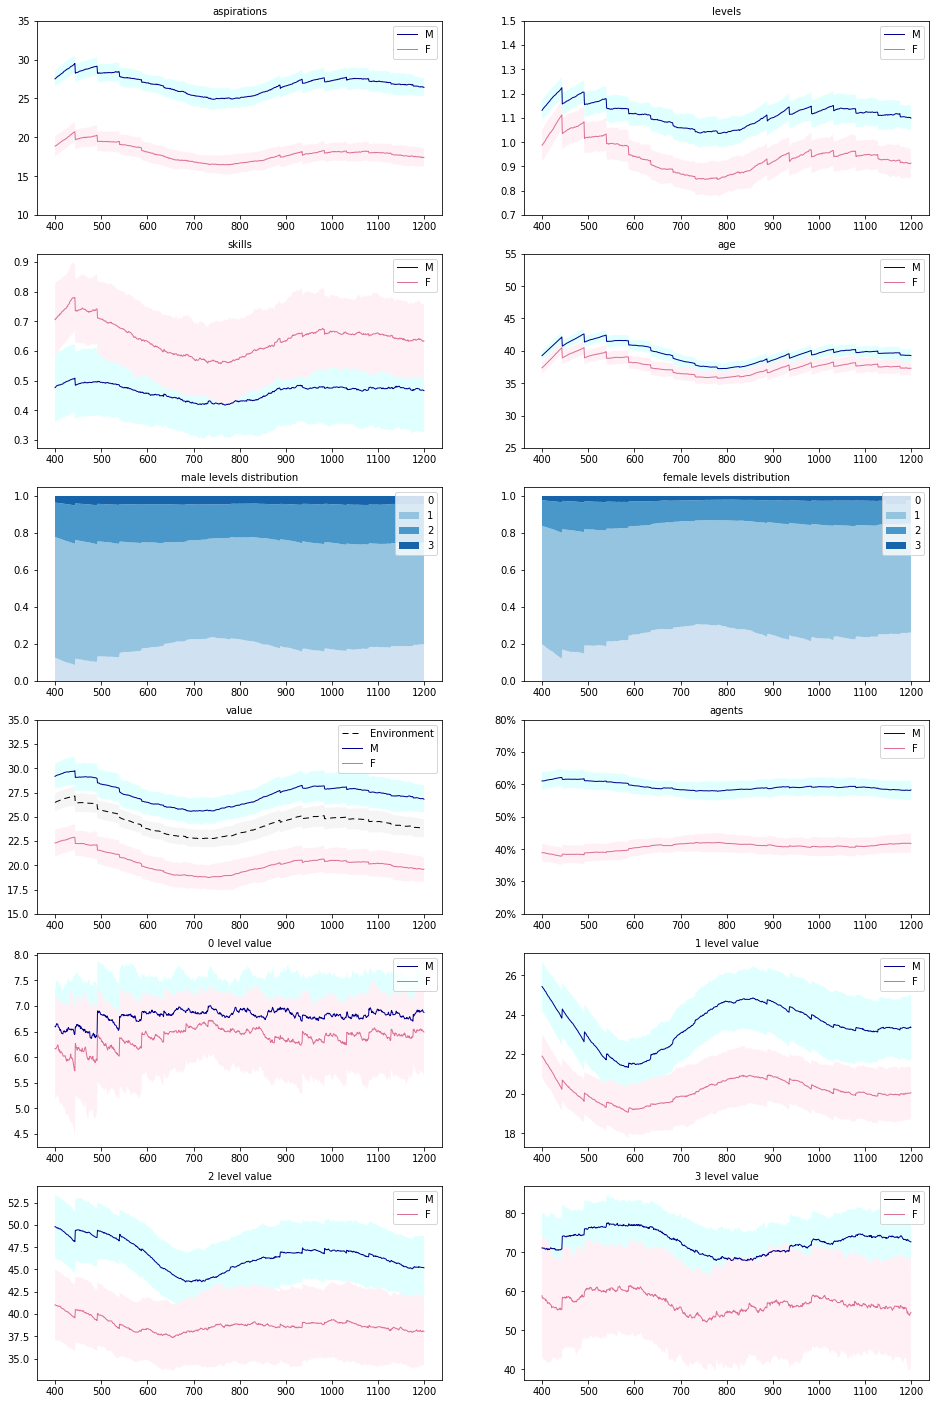

In [4]:
np.random.seed(22)
from quotas import Worker_quotas,JobOffer_quotas,LabourMarket_quotas
iter=100
master_quotas=pd.DataFrame(columns={'Datacollector'},index=range(iter))
for j in range(iter):
    sys.stdout.write('\rSimulation n°: {}'.format(j))
    model_quotas = LabourMarket_quotas(300, 20, 20,0.01)
    for i in range(1200):
        model_quotas.step()
        master_quotas['Datacollector'][j]=model_quotas.datacollector.get_model_vars_dataframe()
df1_quotas,df2_quotas=get_plots(master_quotas)

In [5]:
display(df1_quotas,df2_quotas)

,mean,std
aspiration_M,26.881116,1.239945
aspiration_F,17.964225,1.215868
level_M,1.113839,0.054063
level_F,0.940508,0.064310
age_M,39.667022,0.858678
age_F,37.641081,1.055709
agents_M,0.593469,0.026815
agents_F,0.406531,0.026815
skills_M,0.463372,0.119303
skills_F,0.642348,0.127255


,average difference,std,T-stat,α 1%
aspiration,8.916892,0.302457,29.481523,yes
level,0.173331,0.022095,7.844799,yes
age,2.025941,0.368576,5.496668,yes
agents,0.186937,0.022480,8.315756,yes
skills,-0.178975,0.030590,-5.850784,yes
value,7.100767,0.310539,22.865957,yes


## Motivational events
In this framework female agents can partecipate to motivational events with a frequency of 1 every 6 months to increase their aspiration level, being influenced by the most ambitious women in the system.
```python
def motivational_event(self):
    if np.random.rand()<(1/6) and self.age <= 35 and self.gender=='F':
        aspirations=sorted([agent.aspiration for agent in self.model.schedule.agents if agent.gender == 'F']
                           ,reverse=True)[:3]
        if len(aspirations) > 0: 
            if np.mean(aspirations) > self.aspiration:
                best_aspiration=np.mean(aspirations)
                self.aspiration = self.aspiration*self.model.alpha + best_aspiration*(1-self.model.alpha)
            
```

Simulation n°: 0

C:\Users\acer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\acer\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Simulation n°: 99

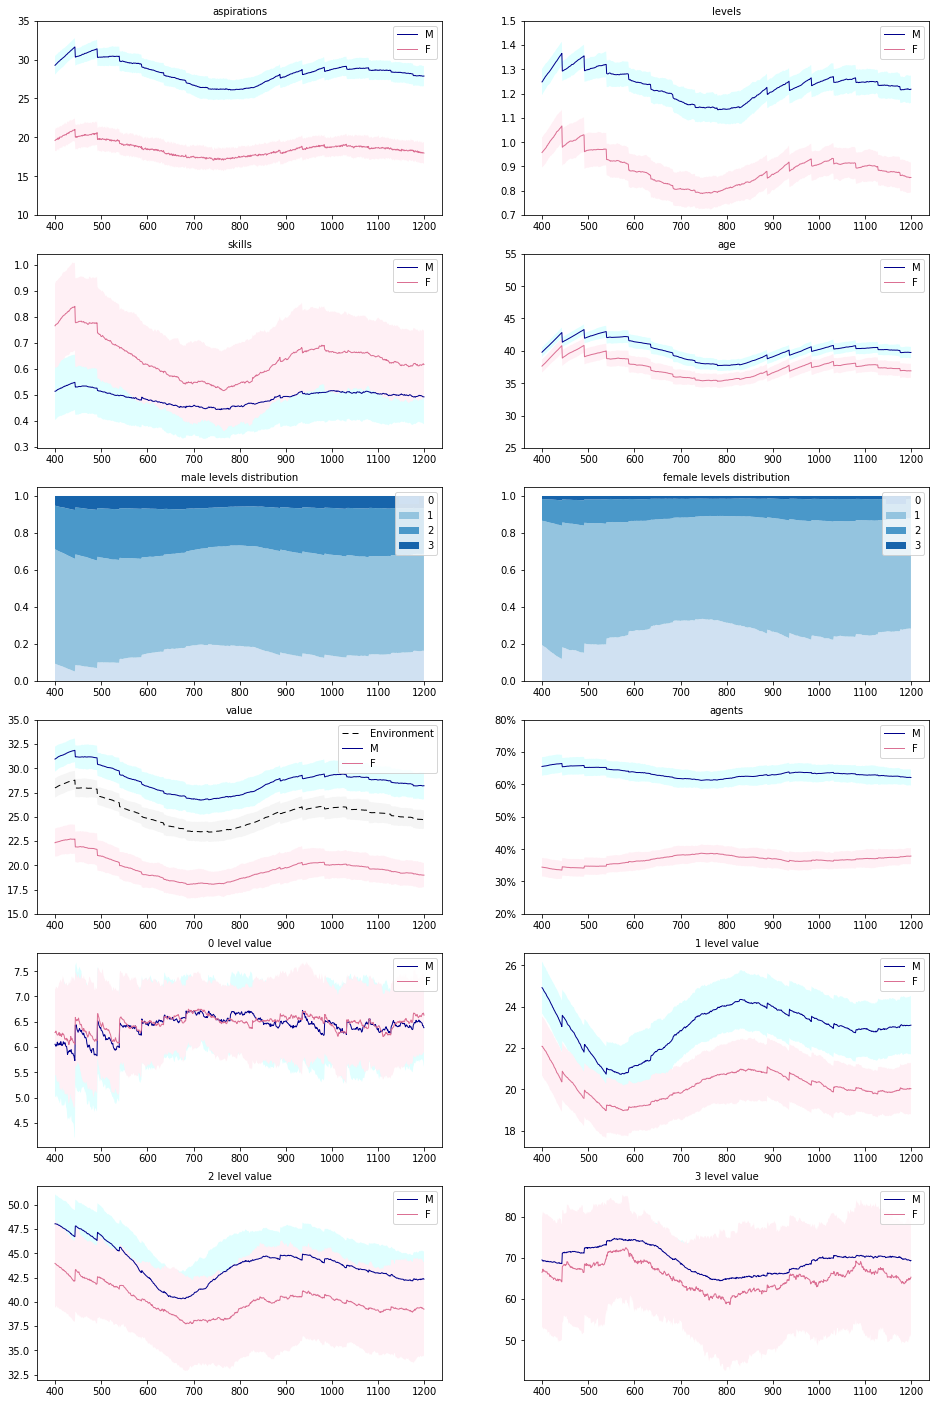

In [6]:
np.random.seed(22)
from events import Worker_events,JobOffer_events,LabourMarket_events
iter=100
master_events=pd.DataFrame(columns={'Datacollector'},index=range(iter))
for j in range(iter):
    sys.stdout.write('\rSimulation n°: {}'.format(j))
    model_events = LabourMarket_events(300, 20, 20,0.01)
    for i in range(1200):
        model_events.step()
        master_events['Datacollector'][j]=model_events.datacollector.get_model_vars_dataframe()
df1_events,df2_events=get_plots(master_events)

In [7]:
display(df1_events,df2_events)

,mean,std
aspiration_M,28.398846,1.262823
aspiration_F,18.530919,1.407840
level_M,1.232535,0.054556
level_F,0.889646,0.066571
age_M,40.182348,0.859771
age_F,37.467537,1.118114
agents_M,0.633618,0.027138
agents_F,0.366382,0.027138
skills_M,0.490955,0.108889
skills_F,0.638946,0.153333


,average difference,std,T-stat,α 1%
aspiration,9.867927,0.570412,17.299639,yes
level,0.342888,0.019394,17.679727,yes
age,2.714811,0.403276,6.731884,yes
agents,0.267236,0.026245,10.182223,yes
skills,-0.147991,0.052144,-2.838096,yes
value,9.051801,0.231466,39.106398,yes


## Training

In this setting women have a higher training frequency compared to the baseline model with gender differences.
```python
def training(self):
    if np.random.rand()<(1/24) and self.age<35 and self.gender=='M':
        self.education*=max(1.01,np.random.randn(1)[0]*0.2+1)
    elif np.random.rand()<(1/36) and self.age<35 and self.gender=='F':
        self.education*=max(1.01,np.random.randn(1)[0]*0.2+1)  
            
```

Simulation n°: 0

C:\Users\acer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\acer\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Simulation n°: 99

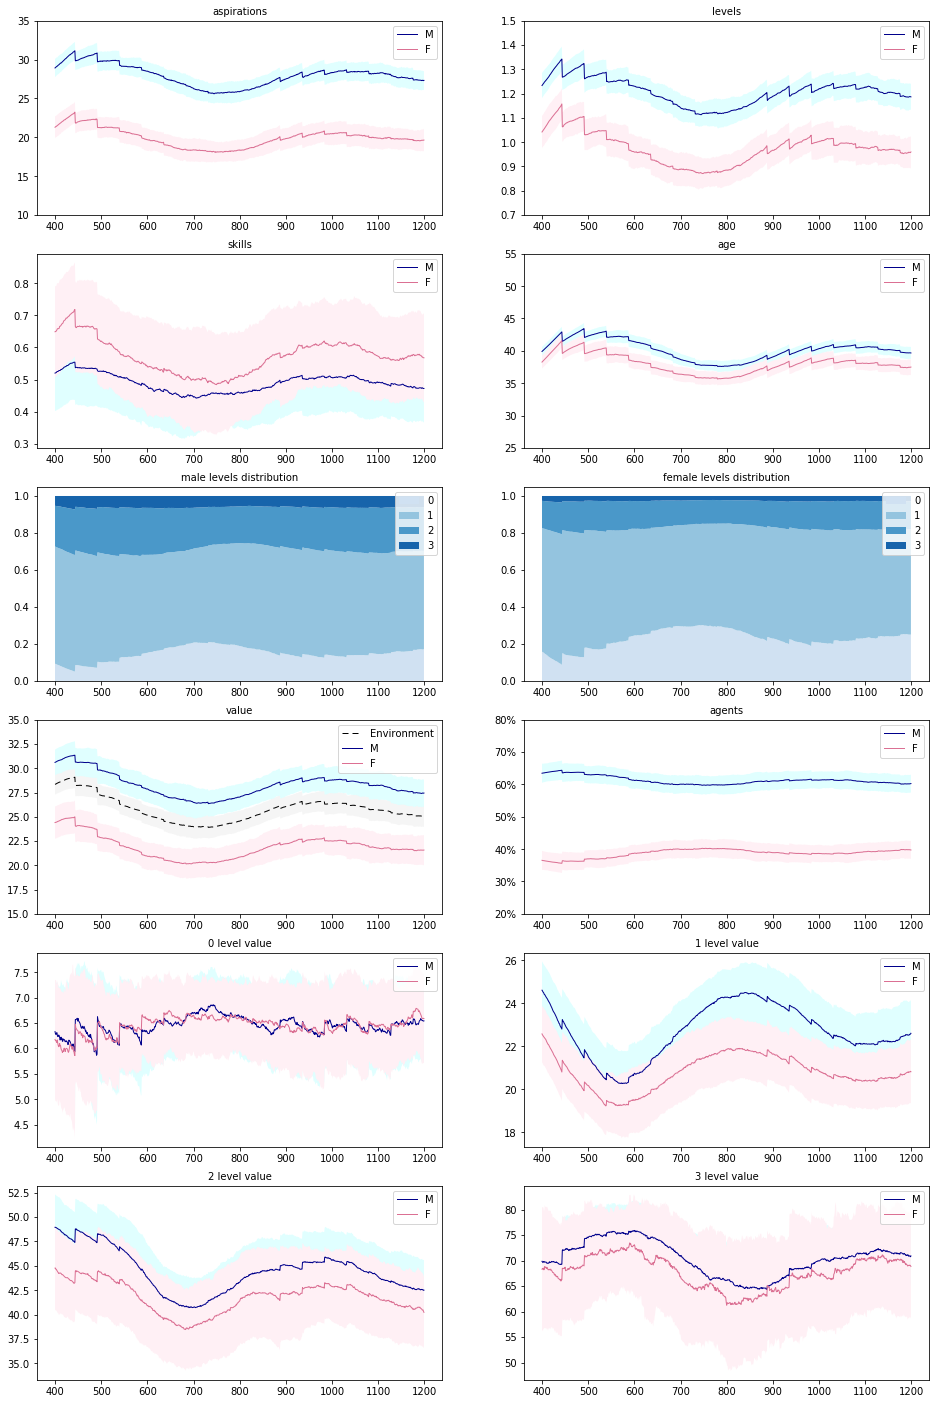

In [8]:
np.random.seed(22)
from training import Worker_training,JobOffer_training,LabourMarket_training
iter=100
master_training=pd.DataFrame(columns={'Datacollector'},index=range(iter))
for j in range(iter):
    sys.stdout.write('\rSimulation n°: {}'.format(j))
    model_training = LabourMarket_training(300, 20, 20,0.01)
    for i in range(1200):
        model_training.step()
        master_training['Datacollector'][j]=model_training.datacollector.get_model_vars_dataframe()
df1_training,df2_training=get_plots(master_training)

In [9]:
display(df1_training,df2_training)

,mean,std
aspiration_M,27.974120,1.247801
aspiration_F,19.937987,1.388736
level_M,1.208584,0.052634
level_F,0.974518,0.065709
age_M,40.172970,0.854845
age_F,37.990250,1.106797
agents_M,0.612926,0.027590
agents_F,0.387074,0.027590
skills_M,0.489881,0.113259
skills_F,0.573117,0.142198


,average difference,std,T-stat,α 1%
aspiration,8.036133,0.387536,20.736498,yes
level,0.234067,0.020672,11.322633,yes
age,2.182719,0.423091,5.158984,yes
agents,0.225852,0.024590,9.184726,yes
skills,-0.083236,0.027226,-3.057204,yes
value,6.375531,0.257146,24.793441,yes


## Proposed solution

Our proposed policy, as explained in the paper, is described in the function below.
```python
def new_policy(self):
    # The gap has to be reduced not by flattening the conditions but by creating ad hoc solutions.
    # Support for families: kinder garden, flexible timetables, work from home, babysitting bonuses.

    if self.gender == 'F' and self.age <= 35 and self.level != 0:

        # Increase the effect of the policy on aspiration as much as it get closer to the average maternity age
        # This because maternity is not perceived as a blocker anymore, the support from the company 
        # increases both the trust in the firm and self confidence for a future career
        self.aspiration += np.sqrt(max(0,(- abs(self.age-30) + 7)))/3

        # The same reasoning above holds, it allows to allocate more time to trainings and personal developement 
        # Moreover, companies could improve training programs top down to increase on one side the opportunities for 
        # females employees and more in general the human capital value across the company
        if np.random.rand()<(1/96): 
            self.education *= max(1.01,np.random.randn(1)[0]*0.2+1)         
```

Simulation n°: 0

C:\Users\acer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\acer\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Simulation n°: 99

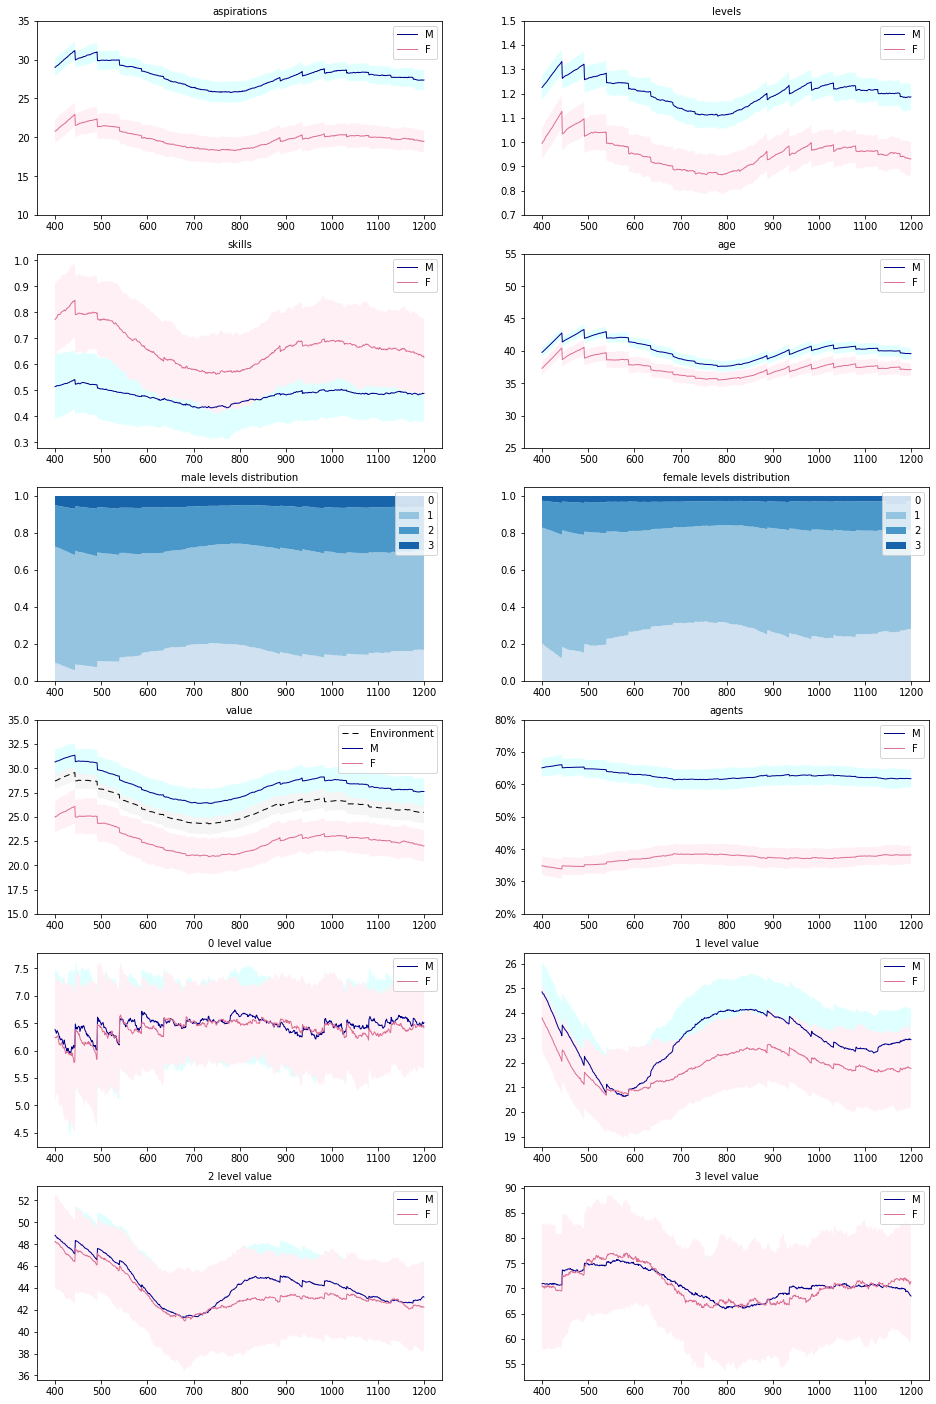

In [10]:
np.random.seed(22)
from fix import Worker_fix,JobOffer_fix,LabourMarket_fix
iter=100
master_fix=pd.DataFrame(columns={'Datacollector'},index=range(iter))
for j in range(iter):
    sys.stdout.write('\rSimulation n°: {}'.format(j))
    model_fix = LabourMarket_fix(300, 20, 20,0.01)
    for i in range(1200):
        model_fix.step()
        master_fix['Datacollector'][j]=model_fix.datacollector.get_model_vars_dataframe()
df1_fix,df2_fix=get_plots(master_fix)

In [11]:
display(df1_fix,df2_fix)

,mean,std
aspiration_M,27.995457,1.201194
aspiration_F,19.916100,1.589457
level_M,1.204554,0.052321
level_F,0.957355,0.073476
age_M,40.117671,0.819489
age_F,37.434793,1.123364
agents_M,0.628578,0.029936
agents_F,0.371422,0.029936
skills_M,0.481551,0.109878
skills_F,0.666644,0.147254


,average difference,std,T-stat,α 1%
aspiration,8.079357,0.345675,23.372699,yes
level,0.247199,0.012527,19.733701,yes
age,2.682878,0.391363,6.855220,yes
agents,0.257156,0.024604,10.451969,yes
skills,-0.185093,0.047158,-3.924968,yes
value,5.573422,0.201118,27.712171,yes


In [12]:
# checking differencies in level 1
level1_M=get_value_distribution(master_fix,'male_value_distribution')[1]
level1_F=get_value_distribution(master_fix,'female_value_distribution')[1]

print('The T-stat for the gender level 1 difference is: ',"{:.3}".format(np.mean(level1_M-level1_F)/np.std(level1_M-level1_F)),' that is not significant at 1% level.')

The T-stat for the gender level 1 difference is:  2.02  that is not significant at 1% level.
